# Introduction
- Using visualizations to explore a dataset then polish a key plot that tells a story to the audience

#### Dataset Overview

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import sklearn
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric values
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Univariate Exploration
__Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?__

In [5]:
base_color = sb.color_palette('viridis', 9) [2]

Text(0.5, 1.0, 'Distribution of Diamond Price')

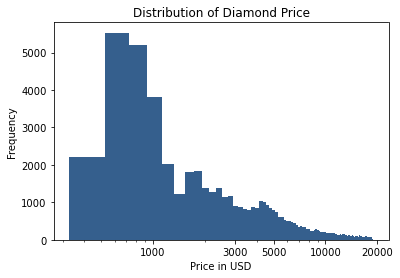

In [6]:
# univariate exploration of diamond prices
bins = np.arange(326, diamonds['price'].max()+200, 200)
plt.hist(data=diamonds, x='price', bins=bins, color=base_color)
plt.xscale('log')
tick_locs = [1000, 3000, 5000, 10000, 20000]
plt.xticks(tick_locs, tick_locs);
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

- The data is roughly bimodal with a highly skewed distribution

__Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?__

Text(0.5, 1.0, 'Distribution of Diamond Carat Weight')

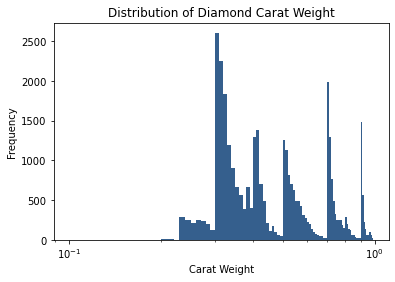

In [7]:
# univariate plot of carat weights
bins = np.arange(0.1, 1, 0.01)
plt.hist(diamonds['carat'], bins=bins , color=base_color)
plt.xscale('log')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')


- there is an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike

__Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?__

In [8]:
diamonds.cut.unique().tolist()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

<AxesSubplot:xlabel='clarity', ylabel='count'>

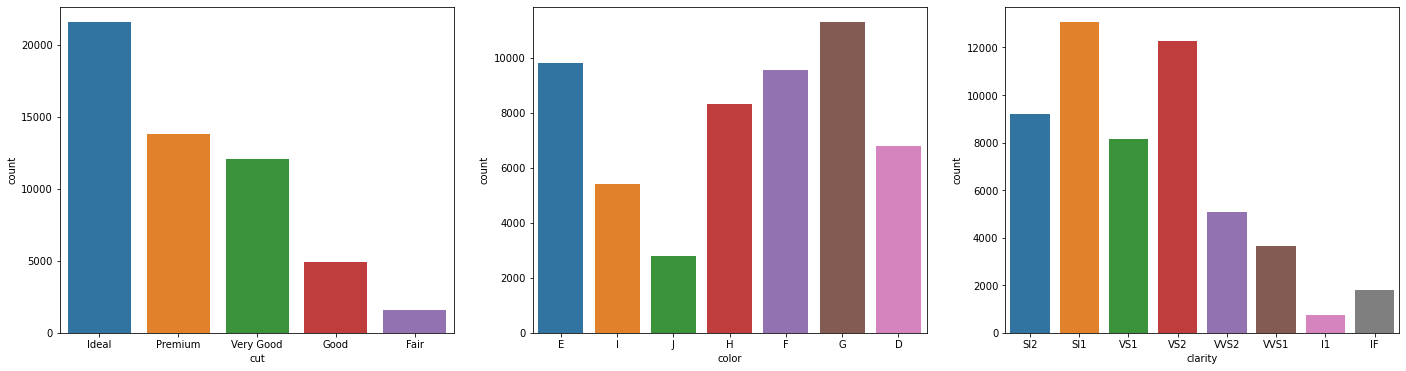

In [9]:
# univariate plots of cut, color, and clarity grades
plt.figure(figsize=[24, 6])

plt.subplot(1, 3, 1)
ordered_cat = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
cat_type = pd.api.types.CategoricalDtype(categories=ordered_cat, ordered=True)
diamonds['cut'] = diamonds['cut'].astype(cat_type)
sb.countplot(data=diamonds, x='cut');

plt.subplot(1, 3, 2)
ordered_cat2 = diamonds['color'].unique().tolist()
cat_type2 = pd.api.types.CategoricalDtype(categories=ordered_cat2, ordered=True)
diamonds['color'] = diamonds['color'].astype(cat_type2)
sb.countplot(data=diamonds, x='color')

plt.subplot(1, 3, 3)
ordered_cat3 = diamonds['clarity'].unique().tolist()
cat_type3 = pd.api.types.CategoricalDtype(categories=ordered_cat3, ordered=True)
diamonds['clarity'] = diamonds['clarity'].astype(cat_type3)
sb.countplot(data=diamonds, x='clarity')

- The mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.
- The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G.
- There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).

# Bivariate Exploration
- Investigating relationships between pairs of carat, cut, color, and clarity, particularly how each of them relate to diamond price.
- To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

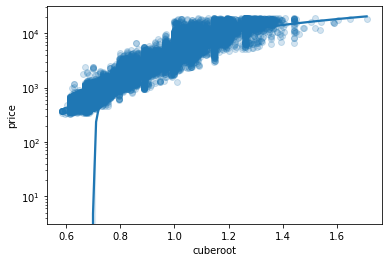

In [10]:
# bivariate plot of price vs. carat
def get_cube_root(num):
    return num ** (1. / 3)

# sb.regplot(data=diamonds, x='carat', y='price')
diamonds['cuberoot'] = diamonds['carat'].apply(lambda x: get_cube_root(x))
sb.regplot(data=diamonds, x='cuberoot', y='price', scatter_kws={'alpha': 1/5})
plt.yscale('log')


- After transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset.
- For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here

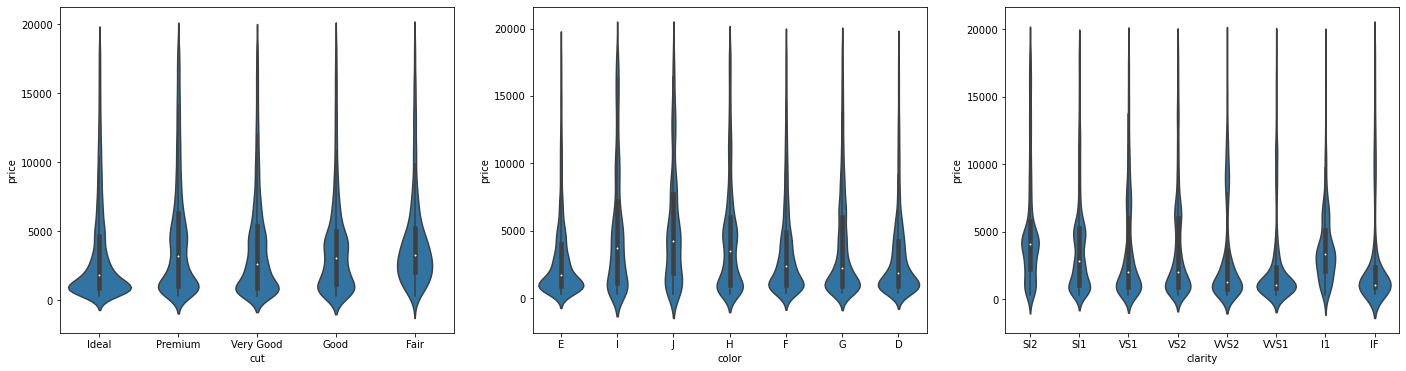

In [11]:
# bivariate plots of price vs. cut, color, clarity
plt.figure(figsize=[24, 6])
base_color = sb.color_palette()[0]

plt.subplot(1, 3, 1)
sb.violinplot(data=diamonds, x='cut', y='price', color=base_color)

plt.subplot(1, 3, 2)
sb.violinplot(data=diamonds, x='color', y='price', color=base_color)

plt.subplot(1, 3, 3)
sb.violinplot(data=diamonds, x='clarity', y='price', color=base_color)
plt.show()

__With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.__

- Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables.
- Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

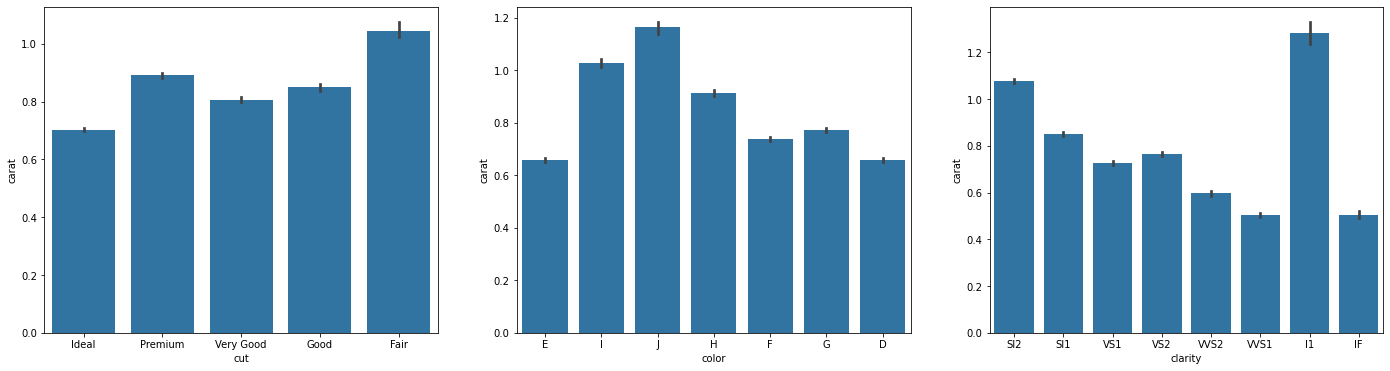

In [12]:
# bivariate plots of carat vs. cut, color, clarity
plt.figure(figsize=[24, 6])
base_color = sb.color_palette()[0]

plt.subplot(1, 3, 1)
# for c in ['cut', 'color', 'clarity']:
sb.barplot(data=diamonds, x='cut', y='carat', color=base_color)

plt.subplot(1, 3, 2)
sb.barplot(data=diamonds, x='color', y='carat', color=base_color)

plt.subplot(1, 3, 3)
sb.barplot(data=diamonds, x='clarity', y='carat', color=base_color)
plt.show()

__Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price__

# Multivariate Exploration
- After looking at various bivariate relationships we've seen that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. We also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.
- Depicting these interaction effects through the use of multivariate plots.

- To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, we saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

__Price by Carat and Clarity Comment 1__: With two numeric variables and one categorical variable, there are two main plot types that make sense.
A scatterplot with points colored by clarity level makes sense on paper, but the sheer number of points causes overplotting that suggests a different plot type. A faceted scatterplot or heat map is a better choice in this case.

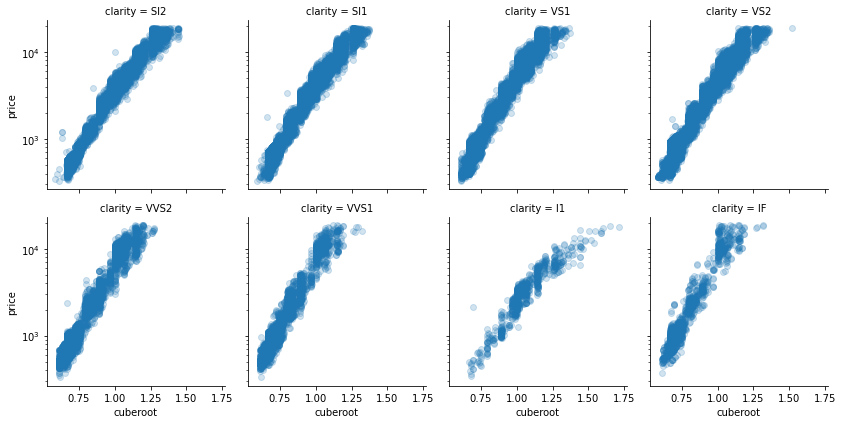

In [13]:
# multivariate plot of price by carat weight, and clarity
def get_cube_root(num):
    return num ** (1. / 3)

diamonds['cuberoot'] = diamonds['carat'].apply(lambda x: get_cube_root(x))
g = sb.FacetGrid(data=diamonds, col='clarity', col_wrap=4)
g.map(plt.scatter, 'cuberoot', 'price', alpha=1/5)
plt.yscale('log')

__There's a general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes__

Text(0.5, 1.0, 'Scatter Plot: Carat Vs Price(Based on Clarity)')

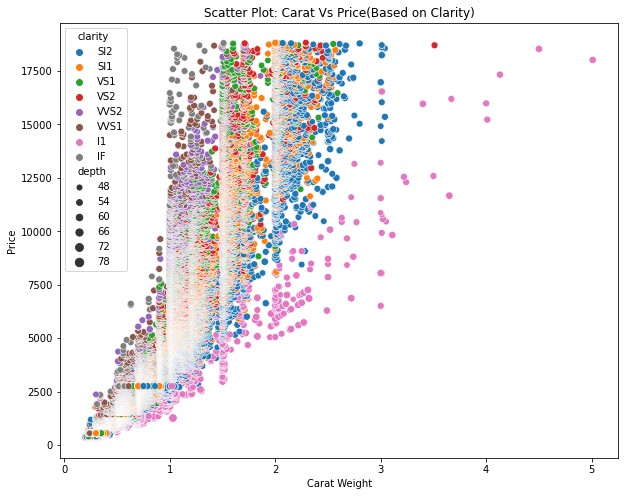

In [14]:
plt.figure(figsize=[10, 8])
sb.scatterplot(x='carat', y='price', hue='clarity', size='depth', data=diamonds)
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.title('Scatter Plot: Carat Vs Price(Based on Clarity)')

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds

__Price by Cut and Color Comment 1__: There's a lot of ways that you could plot one numeric variable against two categorical variables. I think that the clustered box plot or the clustered point plot are the best choices in this case. With the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well.

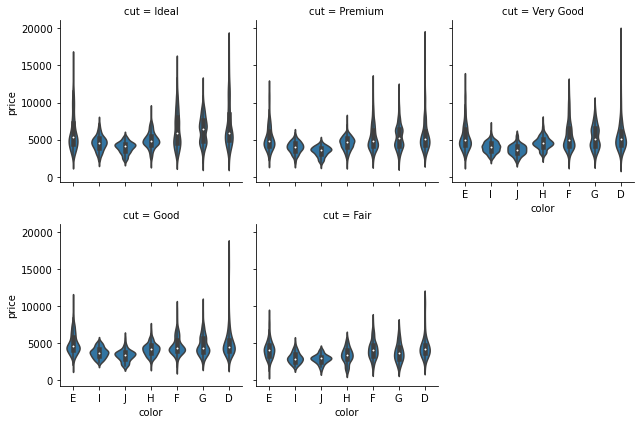

In [15]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
diamond_sub = diamonds[(diamonds["carat"] > 0.8) & (diamonds["carat"] < 1.2)]
g = sb.FacetGrid(data=diamond_sub, col='cut', col_wrap=3)
g.map(sb.violinplot, 'color', 'price')

<AxesSubplot:xlabel='color', ylabel='price'>

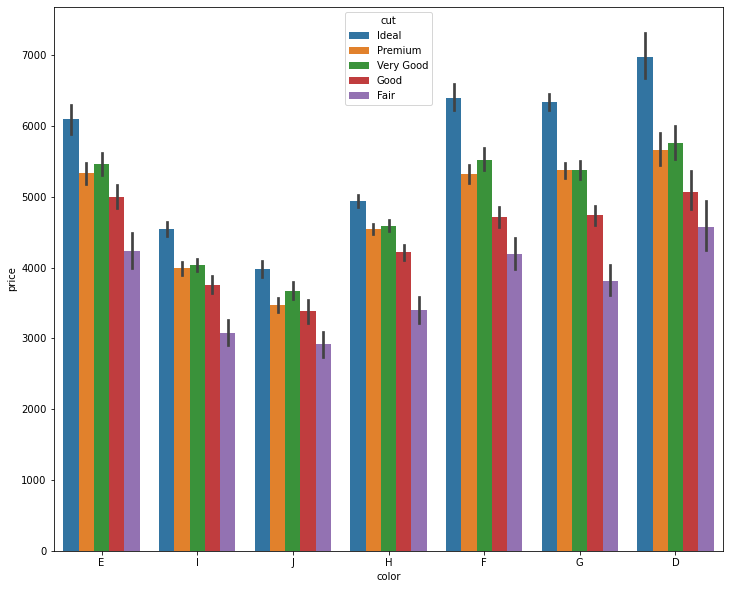

In [16]:
plt.figure(figsize=[12, 10])
sb.barplot(data=diamond_sub, x='color', y='price', hue='cut')

__There is a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable.__

- In the above exploration, we found that the primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades.

##### Plot that depicts the base relationship between price and carat.

In [17]:
def cuberoot_trans(x, inverse=False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

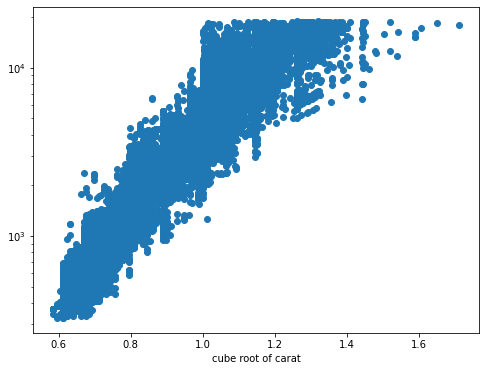

In [18]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)
plt.figure(figsize=[8, 6])

plt.scatter(data=diamonds, x='cr_carat', y='price')
plt.xlabel('cube root of carat')
plt.yscale('log')
plt.show()

##### multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight

In [19]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag, :]

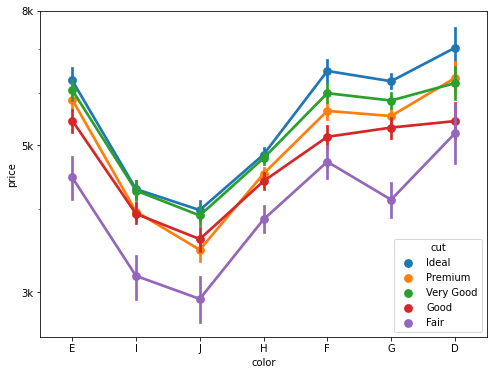

In [20]:
plt.figure(figsize=[8, 6])

ax = sb.pointplot(data=diamonds_1c, x='color', y='price', hue='cut')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor=True)

plt.show()